# Load supported SSP templates

This notebook shows how to load and use the supported SSP templates. Currently we have support for custom build SSP templates stored in hdf5 format for which we provide a template based on Bruzual&Charlot2003 models. Additionally we support all SSP templates that the [pyPipe3D](http://ifs.astroscu.unam.mx/pyPipe3D/) project uses. Those templates come in astronomy friendly fits file format.

In [1]:
from rubix.spectra.ssp.templates import BruzualCharlot2003

BruzualCharlot2003

2024-06-05 20:53:34,744 - rubix - INFO - [SSPModels] File /Users/buck/Documents/Nexus/projects/Rubix/rubix/spectra/ssp/templates/MaStar_CB19.slog_1_5.fits not found. Downloading it from http://ifs.astroscu.unam.mx/pyPipe3D/templates/
2024-06-05 20:53:35,102 - rubix - ERROR - [SSPModels] Error: 404 Client Error: Not Found for url: http://ifs.astroscu.unam.mx/pyPipe3D/templates/MaStar_CB19.slog_1_5.fits


FileNotFoundError: Could not download file MaStar_CB19.slog_1_5.fits from url http://ifs.astroscu.unam.mx/pyPipe3D/templates/.

In [ ]:
print(BruzualCharlot2003.age)

## Load SSP template via custom config

This shows how to use a custom configuration to load an SSP template that is stored under some file location on your disk.

In [38]:
config = {
        "name": "Bruzual & Charlot (2003)",
        "format": "HDF5",
        "source": "https://www.bruzual.org/bc03/",
        "file_name": "BC03lr.h5",
        "fields": {
            "age": {
                "name": "age",
                "units": "Gyr",
                "in_log": False
            },
            "metallicity": {
                "name": "metallicity",
                "units": "",
                "in_log": False
            },
            "wavelength": {
                "name": "wavelength",
                "units": "Angstrom",
                "in_log": False
            },
            "flux": {
                "name": "flux",
                "units": "Lsun/Angstrom",
                "in_log": False
            }
        }
    }


In [39]:
from rubix.spectra.ssp.grid import HDF5SSPGrid
ssp = HDF5SSPGrid.from_file(config, file_location="../rubix/spectra/ssp/templates")
ssp

HDF5SSPGrid(age=Array([ 0.       ,  5.100002 ,  5.1500006,  5.1999993,  5.25     ,
        5.3000016,  5.350002 ,  5.4000006,  5.4500012,  5.500002 ,
        5.550002 ,  5.600002 ,  5.6500025,  5.700002 ,  5.750002 ,
        5.8000026,  5.850003 ,  5.900003 ,  5.950003 ,  6.       ,
        6.0200005,  6.040001 ,  6.0599985,  6.0799985,  6.100002 ,
        6.120001 ,  6.1399984,  6.16     ,  6.18     ,  6.1999993,
        6.2200007,  6.24     ,  6.2599998,  6.2799997,  6.2999997,
        6.3199987,  6.3399997,  6.3600006,  6.3799996,  6.3999987,
        6.4200006,  6.44     ,  6.4599996,  6.4799995,  6.499999 ,
        6.52     ,  6.539999 ,  6.56     ,  6.5799994,  6.6      ,
        6.6199994,  6.6399994,  6.66     ,  6.679999 ,  6.699999 ,
        6.72     ,  6.7399993,  6.7599993,  6.7799997,  6.799999 ,
        6.819999 ,  6.839999 ,  6.8599997,  6.879999 ,  6.899999 ,
        6.919999 ,  6.939999 ,  6.959999 ,  6.9799986,  6.999999 ,
        7.0200005,  7.040001 ,  7.0599985,  7.

In [31]:
ssp.age.shape

(221,)

In [32]:
ssp.metallicity.shape

(6,)

In [34]:
ssp.wavelength.shape

(842,)

In [30]:
ssp.flux.shape

(6, 221, 842)

## Automatic download supported SSP template

Rubix supports automatic download of a supported SSP template from a specified url in case the template can't be found on disk under the file_location specified.

In [35]:
config = {
        "name": "Mastar Charlot & Bruzual (2019)",
        "format": "pyPipe3D",
        "source": "http://ifs.astroscu.unam.mx/pyPipe3D/templates/",
        "file_name": "MaStar_CB19.slog_1_5.fits.gz",
        "fields": {
            "age": {
                "name": "age",
                "units": "Gyr",
                "in_log": False
            },
            "metallicity": {
                "name": "metallicity",
                "units": "",
                "in_log": False
            },
            "wavelength": {
                "name": "wavelength",
                "units": "Angstrom",
                "in_log": False
            },
            "flux": {
                "name": "flux",
                "units": "Lsun/Angstrom",
                "in_log": False
            }
        }
    }


In [36]:
from rubix.spectra.ssp.grid import pyPipe3DSSPGrid
ssp = pyPipe3DSSPGrid.from_file(config, file_location="../rubix/spectra/ssp/templates")
ssp

/Users/buck/Documents/Nexus/projects/Rubix/rubix/spectra/ssp/grid.py:336: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in zeros is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  ages = jnp.zeros(n_models, dtype=jnp.float64)
/Users/buck/Documents/Nexus/projects/Rubix/rubix/spectra/ssp/grid.py:337: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in zeros is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  Zs = jnp.zeros(n_models, dtype=jnp.float64)
/Users/buck/Documents/Nexus/projects/Rubix/rubix/spectra/ssp/grid.py:338: UserWarning: Explicitly requested dtype 

pyPipe3DSSPGrid(age=Array([1.000e-03, 2.300e-03, 3.800e-03, 5.750e-03, 8.000e-03, 1.150e-02,
       1.500e-02, 2.000e-02, 2.600e-02, 3.300e-02, 4.250e-02, 5.350e-02,
       7.000e-02, 9.000e-02, 1.100e-01, 1.400e-01, 1.800e-01, 2.250e-01,
       2.750e-01, 3.500e-01, 4.500e-01, 5.500e-01, 6.500e-01, 8.500e-01,
       1.100e+00, 1.300e+00, 1.600e+00, 2.000e+00, 2.500e+00, 3.000e+00,
       3.750e+00, 4.500e+00, 5.250e+00, 6.250e+00, 7.500e+00, 8.500e+00,
       1.025e+01, 1.200e+01, 1.350e+01], dtype=float32), metallicity=Array([1.0e-04, 5.0e-04, 2.0e-03, 8.0e-03, 1.7e-02, 3.0e-02, 4.0e-02],      dtype=float32), wavelength=Array([2000. , 2001.5, 2003. , ..., 9995. , 9996.5, 9998. ], dtype=float32), flux=Array([[4.88501154e-02, 4.94970530e-02, 8.76932293e-02, ...,
        9.31926749e-08, 9.43405638e-08, 1.05849416e-07],
       [4.91619967e-02, 5.01737520e-02, 8.82892460e-02, ...,
        1.01580000e-07, 1.17012490e-07, 1.30914998e-07],
       [4.91009988e-02, 5.02070002e-02, 8.89149979e-

In [25]:
ssp.age.shape

(39,)

In [26]:
ssp.metallicity.shape

(7,)

In [37]:
ssp.wavelength.shape

(5333,)

In [27]:
ssp.flux.shape

(5333, 273)

## Lets plot some example spectra

In [18]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Flux [Lsun/Angstrom]')

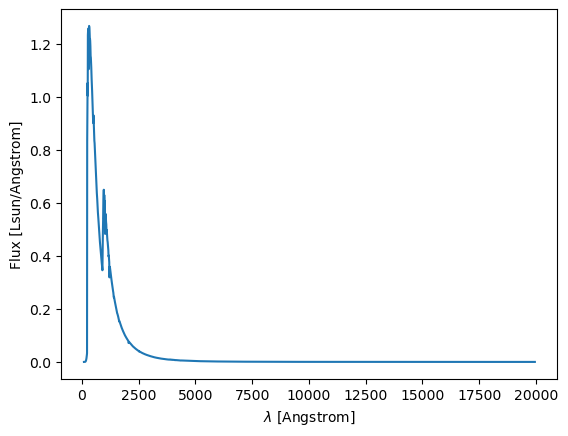

In [51]:
plt.plot(ssp.wavelength,ssp.flux[0][0])
plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")

Text(0, 0.5, 'Flux [$\\rm{L_\\odot}/\\rm{Angstrom}$]')

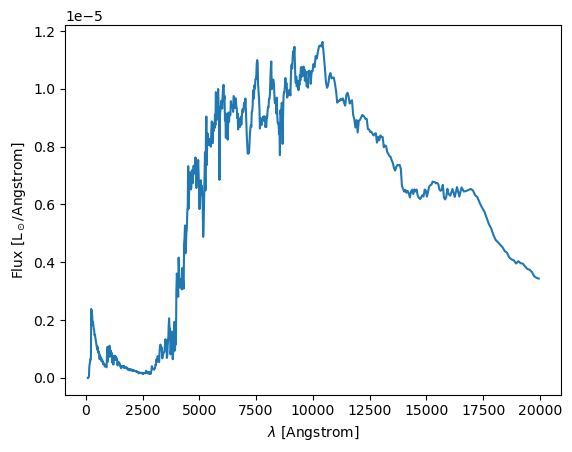

In [53]:
plt.plot(ssp.wavelength,ssp.flux[-1][-1])
plt.xlabel(r'$\lambda$ [Angstrom]')
plt.ylabel(r'Flux [$\rm{L_\odot}/\rm{Angstrom}$]')
#plt.yscale("log")

(0.0, 5000.0)

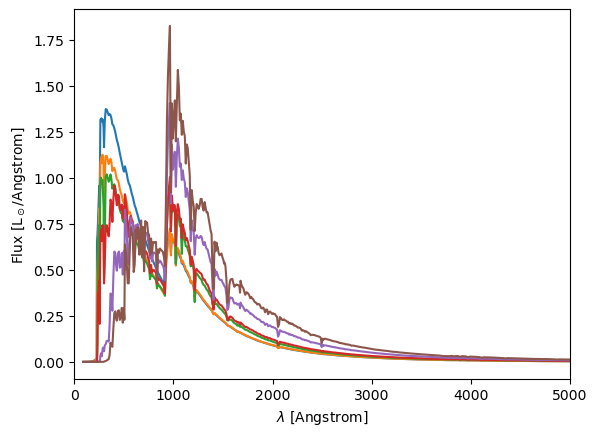

In [103]:
for i in range(len(ssp.metallicity)):
    plt.plot(ssp.wavelength,ssp.flux[i][20])
plt.xlabel(r'$\lambda$ [Angstrom]')
plt.ylabel(r'Flux [$\rm{L_\odot}/\rm{Angstrom}$]')
#plt.yscale("log")
plt.xlim(0,5000)

In [80]:
import numpy as np 
ages = np.linspace(0,len(ssp.age)-1,12)

In [84]:
ages

array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
       220.])

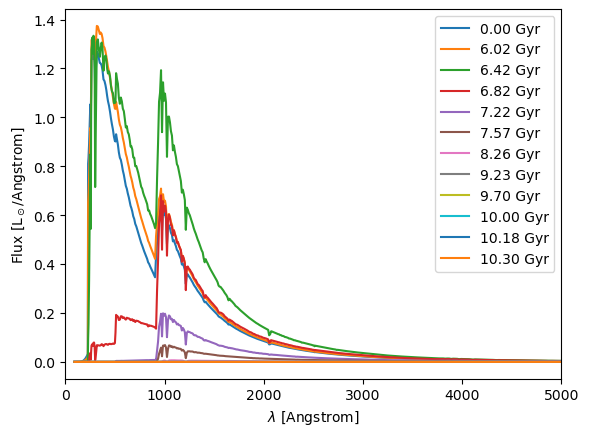

In [91]:
for age in ages:
    plt.plot(ssp.wavelength,ssp.flux[0][int(age)], label='%.2f %s'%(ssp.age[int(age)], config["fields"]["age"]["units"]))
plt.xlabel(r'$\lambda$ [Angstrom]')
plt.ylabel(r'Flux [$\rm{L_\odot}/\rm{Angstrom}$]')
#plt.yscale("log")
plt.xlim(0,5000)
plt.legend()

In [67]:
ssp.age[-1]

Array(10.30103, dtype=float32)